In [5]:
from IPython.display import YouTubeVideo

# X01: Introduction to APIs

In this section of the course we'll look at API's and how we can use them with Python. For many people APIs can be a bit of a mystery, but there's nothing to fear - as with most things, the concept is actually quite simple once you cut away the jargon.

## What is an API?

API stands for Application Program Interface and a popular technical definition is this:

<i>'A set of functions and procedures that allow the creation of applications which access the features or data of an operating system, application, or other service.'</i>
    
However on a more simple level, you can think of it as:

<i>'How computers, apps, or pieces of software communicate with one another'</i>

<img src = img/API.png>

API's can take many forms and you may not have realised it but you've been using APIs throughout this training course through libraries such as <a href = "http://pandas.pydata.org/pandas-docs/stable/api.html">Pandas</a>, <a href = "http://matplotlib.org/api/">Matplotlib</a> and <a href = "https://stanford.edu/~mwaskom/software/seaborn/api.html">Seaborn</a>. These are all examples of software APIs where the interface that your computer is using to communicate with the software library is of course Python!

In this lesson we're going to be looking at how we can use Python to interact with web based APIs.

## What can you use web based APIs for?

You can use web based APIs for a variety of things including:

* Making requests to use a particular service (e.g. embedding Google Maps on your website)
* Making requests for data (e.g. using the <a href = "https://api.tfl.gov.uk/">TfL API</a>)
* Performing an action (e.g. Posting to twitter or authenticating a user)

Most APIs have an authentication system to regulate access so in most cases you'll need to register and get an API key.

In terms of There are two main types of web based APIs that you're likely to come across... Representational State Transfer (REST) and  Simple Object Access Protocol (SOAP). In this lesson we're going to be focussing on using REST  APIs and the following video gives an excellent introduction:

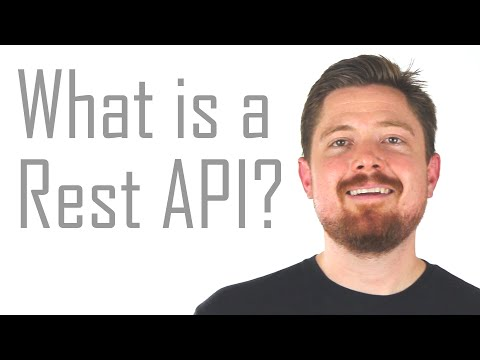

In [6]:
YouTubeVideo("7YcW25PHnAA",width=800,height=600)

## Breaking down an API request

<img src = "img/structure.png">

Any API requests that you make have a distinct structure as follows:

* URL: The location of the API. Can also contain parameters relating to the request such as the API key.
* Method: What we want the API to do:
    GET - Retrieves a resource
    POST - Creates a new resource
    PUT - Edits an existing resource
    DELETE - Deletes a resource
* Headers: The parameters of the transaction with the API.
* Body: Contains the content of the API request

In making an API request, we'll also need to be aware of something called an <b>API endpoint</b> which the the URL location of where our API request will end up. These are called endpoints simply because they go at the end of the URL. APIs can have multiple endpoints for different resources.

We'll also need to be aware of something called a <b>Query String</b>. This is some text that is appended to the API endpoint location and allows us to set parameters for our API request.

## The API Response

Once our API request has been made, we'll receive a response in the following format:

* Header: As beforem the parameters of the transaction with the API
* Response: A 3 digit code that indicates the status of our request. Some common codes are as follows:

    <b>200</b> Successful<br/>
    <b>300</b> Multiple Choices<br/>
    <b>301</b> Moved Permanently<br/>
    <b>302</b> Found<br/>
    <b>304</b> Not Modified<br/>
    <b>307</b> Temporary Redirect<br/>
    <b>400</b> Bad Request<br/>
    <b>401</b> Unauthorized<br/>
    <b>403</b> Forbidden<br/>
    <b>404</b> Not Found<br/>
    <b>410</b> Gone<br/>
    <b>500</b> Internal Server Error<br/>
    <b>501</b> Not Implemented<br/>
    <b>503</b> Service Unavailable<br/>
    <b>550</b> Permission denied<br/>

A full list of what they mean can be found here <a href = "https://www.smartlabsoftware.com/ref/http-status-codes.htm">here</a>.

The two most common are 200 (where your request has been successful) and 404 (where the URL doesn'r exist).

The response from REST APIs will usually be in JSON format.

## An Example API Request

We're going to look at a <a href = "http://darwin.hacktrain.com/">REST API built by Alejandro Saucedo at Hacktrain</a> to interface with the <a href = "http://www.nationalrail.co.uk/100296.aspx">DARWIN</a> service which is the GB rail industry’s official train running information engine. This is a nice simple API to get us started! Note that every API is slightly different and some trial and error will be required to make it work.

We're going to explore the API through the <a href = "http://darwin.hacktrain.com/docs/">Hacktrain console</a> first, before the interfacing with it using Python.

## Using Python to make API requests

We can make and receive API requests using Python via a package called <a href = "http://docs.python-requests.org/en/master/">Requests</a>.

<img src = "img/Requests.png">

Requests describes itself as an elegant and simple HTTP library for Python, built for human beings. It's included as part of the Anaconda installation so you don't need to do anything. We'll also import the DataFrame class from pandas so we can handle the response from the API.

In [7]:
import requests
import pandas as pd

Once you understand how APIs work, Requests is really easy to use. To illustrate this we're going to make a request to the Hacktrain API above. First we'll need to input some parameters:

In [8]:
url   = 'http://darwin.hacktrain.com/api/train/'                       # The Location of the API
values= {'apiKey':'b05cc6d2-7704-4350-a44f-062b59ba39c5','rows':'10'}  # A Dictionary for our API key and limiting the rows to 50
stat  = 'EUS'									                       # The API parameter for Station

In [9]:
r = requests.get(url+stat,params=values)                               # Makes the request and assigns it to the r object.

Lets explore what we can do with our r object:

In [15]:
r.request           # The type of request we made
r.status_code       # The 3 digit API response code
r.reason            # The decode for the API response reason code
r.headers           # The headers associated with the API response
r.cookies           # Shows any cookies related to the API response
r.url               # The URL of the API response
r.text              # The content (body) of the response in text format
r.json()            # The content (body) of the response in JSON format

[{'destinations': [{'stationCode': 'VIC', 'stationName': 'London Victoria'}],
  'estimatedArrivalTime': '11:32',
  'estimatedDepartureTime': None,
  'operatorCode': 'SN',
  'operatorName': 'Southern',
  'origins': [{'stationCode': 'LIT', 'stationName': 'Littlehampton'},
   {'stationCode': 'ORE', 'stationName': 'Ore'}],
  'platform': '16',
  'scheduledArrivalTime': '10:58',
  'scheduledDepartureTime': None,
  'serviceId': 'C3KZLGwpc5mVqAXtLqqddA=='},
 {'destinations': [{'stationCode': 'VIC', 'stationName': 'London Victoria'}],
  'estimatedArrivalTime': '11:28',
  'estimatedDepartureTime': None,
  'operatorCode': 'GX',
  'operatorName': 'Gatwick Express',
  'origins': [{'stationCode': 'BTN', 'stationName': 'Brighton'}],
  'platform': '13',
  'scheduledArrivalTime': '11:15',
  'scheduledDepartureTime': None,
  'serviceId': 'n3kC7sg34VNjLZykLpUTAA=='},
 {'destinations': [{'stationCode': 'HHE', 'stationName': 'Haywards Heath'},
   {'stationCode': 'EBN', 'stationName': 'Eastbourne'}],
  'est

JSON isn't designed for humans, but we can pass the JSON object to the pandas DataFrame class to display the information in a more meaningful format:

In [16]:
df = pd.DataFrame(r.json())
df.head(5)

,destinations,estimatedArrivalTime,estimatedDepartureTime,operatorCode,operatorName,origins,platform,scheduledArrivalTime,scheduledDepartureTime,serviceId
0,"[{'stationName': 'London Victoria', 'stationCo...",11:32,None,SN,Southern,"[{'stationName': 'Littlehampton', 'stationCode...",16,10:58,None,C3KZLGwpc5mVqAXtLqqddA==
1,"[{'stationName': 'London Victoria', 'stationCo...",11:28,None,GX,Gatwick Express,"[{'stationName': 'Brighton', 'stationCode': 'B...",13,11:15,None,n3kC7sg34VNjLZykLpUTAA==
2,"[{'stationName': 'Haywards Heath', 'stationCod...",None,Delayed,SN,Southern,"[{'stationName': 'London Victoria', 'stationCo...",None,None,11:17,TO/B+Bk0xEzA8hpsA3qH7w==
3,"[{'stationName': 'London Victoria', 'stationCo...",11:27,None,SN,Southern,"[{'stationName': 'Tonbridge', 'stationCode': '...",19,11:21,None,V5E4j3rgqvUbvH2XIu3EGg==
4,"[{'stationName': 'East Grinstead', 'stationCod...",None,11:26,SN,Southern,"[{'stationName': 'London Victoria', 'stationCo...",19,None,11:23,NRLBTcKaGOuGuBOgaUXjow==


We can tidy the dataframe with a for loop and a list comprehension as follows:

In [17]:
df['Origin Station'] = ''
df['Destination Station'] = ''					# Blank variables to populate

for x in df.index.values:						# List comprehension to clean origin / destination variables
	df['Origin Station'][x] = df['origins'][x][0]['stationName']
	df['Destination Station'][x] = df['destinations'][x][0]['stationName']

df.drop(['origins','destinations','platform','operatorCode'],axis=1,inplace=True)
df = df[['Origin Station','Destination Station','scheduledArrivalTime','estimatedArrivalTime','scheduledDepartureTime','estimatedDepartureTime','operatorName','serviceId']]

df

,Origin Station,Destination Station,scheduledArrivalTime,estimatedArrivalTime,scheduledDepartureTime,estimatedDepartureTime,operatorName,serviceId
0,Littlehampton,London Victoria,10:58,11:32,None,None,Southern,C3KZLGwpc5mVqAXtLqqddA==
1,Brighton,London Victoria,11:15,11:28,None,None,Gatwick Express,n3kC7sg34VNjLZykLpUTAA==
2,London Victoria,Haywards Heath,None,None,11:17,Delayed,Southern,TO/B+Bk0xEzA8hpsA3qH7w==
3,Tonbridge,London Victoria,11:21,11:27,None,None,Southern,V5E4j3rgqvUbvH2XIu3EGg==
4,London Victoria,East Grinstead,None,None,11:23,11:26,Southern,NRLBTcKaGOuGuBOgaUXjow==
5,London Victoria,Orpington,None,None,11:25,On time,Southeastern,GoOUoNeF5ksNZx3kjYmYdQ==
6,Brighton,London Victoria,11:25,11:49,None,None,Southern,bQkpxR48G80VMQ2bh6s5uw==
7,Littlehampton,London Victoria,11:28,11:45,None,None,Southern,GXblagTnx/oDJRfdDgkaCw==
8,Dartford,London Victoria,11:28,11:30,None,None,Southeastern,yR/smJQbZ9UWWH8HvZLwpQ==
9,Epsom Downs,London Victoria,11:28,On time,None,None,Southern,I2Kd72hdIex0854KNiCeaA==


We can combine our code with a for loop and a list of some stations in London as follows:

In [19]:
# List of station codes to iterate through:

stat_list  = ['VIC','WAT','PAD','LST','CLJ','KGX','EUS','LBG','SRA']

# Creating a blank dataframe to which we can append our results:

df = pd.DataFrame(columns=['Query Code','Origin Station','Destination Station','scheduledArrivalTime','estimatedArrivalTime',
                           'scheduledDepartureTime','estimatedDepartureTime','operatorName','serviceId'])

# For loop to make the  request and clean the results:

for stat in stat_list:
	r = requests.get(url+stat,params=values)         # Makes the request
	df_stat = pd.DataFrame(r.json()) 		 # Creates a dataframe based upon the response data

	df_stat['Origin Station'] = ''
	df_stat['Destination Station'] = ''
	df_stat['Query Code'] = stat	

	for x in df_stat.index.values:						# List comprehension to clean origin / destination variables
		df_stat['Origin Station'][x] = df_stat['origins'][x][0]['stationName']
		df_stat['Destination Station'][x] = df_stat['destinations'][x][0]['stationName']

	df_stat.drop(['origins','destinations','platform','operatorCode'],axis=1,inplace=True)
	df_stat = df_stat[['Query Code','Origin Station','Destination Station','scheduledArrivalTime','estimatedArrivalTime','scheduledDepartureTime','estimatedDepartureTime','operatorName','serviceId']]
	df = pd.concat([df,df_stat])
    
df

,Query Code,Origin Station,Destination Station,scheduledArrivalTime,estimatedArrivalTime,scheduledDepartureTime,estimatedDepartureTime,operatorName,serviceId
0,VIC,Littlehampton,London Victoria,10:58,11:32,None,None,Southern,C3KZLGwpc5mVqAXtLqqddA==
1,VIC,Brighton,London Victoria,11:15,11:29,None,None,Gatwick Express,n3kC7sg34VNjLZykLpUTAA==
2,VIC,London Victoria,Haywards Heath,None,None,11:17,Delayed,Southern,TO/B+Bk0xEzA8hpsA3qH7w==
3,VIC,Tonbridge,London Victoria,11:21,11:27,None,None,Southern,V5E4j3rgqvUbvH2XIu3EGg==
4,VIC,Brighton,London Victoria,11:25,11:50,None,None,Southern,bQkpxR48G80VMQ2bh6s5uw==
5,VIC,Epsom Downs,London Victoria,11:28,On time,None,None,Southern,I2Kd72hdIex0854KNiCeaA==
6,VIC,Dartford,London Victoria,11:28,11:30,None,None,Southeastern,yR/smJQbZ9UWWH8HvZLwpQ==
7,VIC,Littlehampton,London Victoria,11:28,11:44,None,None,Southern,GXblagTnx/oDJRfdDgkaCw==
8,VIC,London Victoria,Brighton,None,None,11:30,11:35,Gatwick Express,Qv57M9Mh4/5doFwRxWPTYg==
9,VIC,Gatwick Airport,London Victoria,11:30,11:46,None,None,Gatwick Express,3WO/KprwB2c0RGAU997eBQ==


## Further Reading

<a href = "https://zapier.com/learn/apis/chapter-2-protocols/">Introduction to APIs</a><br/>
<a href = "http://docs.python-requests.org/en/master/user/quickstart/">Requests API reference</a><br/>
<a href = "http://blog.smartbear.com/apis/understanding-soap-and-rest-basics/">REST vs SOAP</a><br/>
<a href = "https://dev.socrata.com/docs/endpoints.html">API Endpoints</a><br/>
<a href = "https://www.smartlabsoftware.com/ref/http-status-codes.htm">HTTP Status Codes</a><br/>